In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [38]:
df = pd.read_csv("../data/data.csv")
#print(df.columns)
#df.head(3)

df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
#df.head(5)

df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "DriveMode","highway MPG": "MPG-Highway", "city mpg": "MPG-City", "MSRP": "Price" })
df.head(5)

duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

df.count()

df = df.drop_duplicates()
print(df.head(5))

df.count()

print(df.isnull().sum())

df = df.dropna()    # Dropping the missing values.
df.count()

print(df.isnull().sum())   # After dropping the values

number of duplicate rows:  (989, 10)
  Make       Model  Year     HP  Cylinders Transmission         DriveMode  \
0  BMW  1 Series M  2011  335.0        6.0       MANUAL  rear wheel drive   
1  BMW    1 Series  2011  300.0        6.0       MANUAL  rear wheel drive   
2  BMW    1 Series  2011  300.0        6.0       MANUAL  rear wheel drive   
3  BMW    1 Series  2011  230.0        6.0       MANUAL  rear wheel drive   
4  BMW    1 Series  2011  230.0        6.0       MANUAL  rear wheel drive   

   MPG-Highway  MPG-City  Price  
0           26        19  46135  
1           28        19  40650  
2           28        20  36350  
3           28        18  29450  
4           28        18  34500  
Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
DriveMode        0
MPG-Highway      0
MPG-City         0
Price            0
dtype: int64
Make            0
Model           0
Year            0
HP              0
Cylinders       0
Tra



---



## 9. Discovering the automotive industry through data visualization

### The largest car maker in the dataset: Chevrolet

In the cars dataset there are multiple automotive makers. In order to discover which makers are producing the most numbers of cars the Pandas' `value_counts` can be utilized to get a series of unique car makers. After filtering the results and restricting it to the first 40 producers the bar plot below is produced. The plot clearly shows that Chevrolet counts the most number of cars.

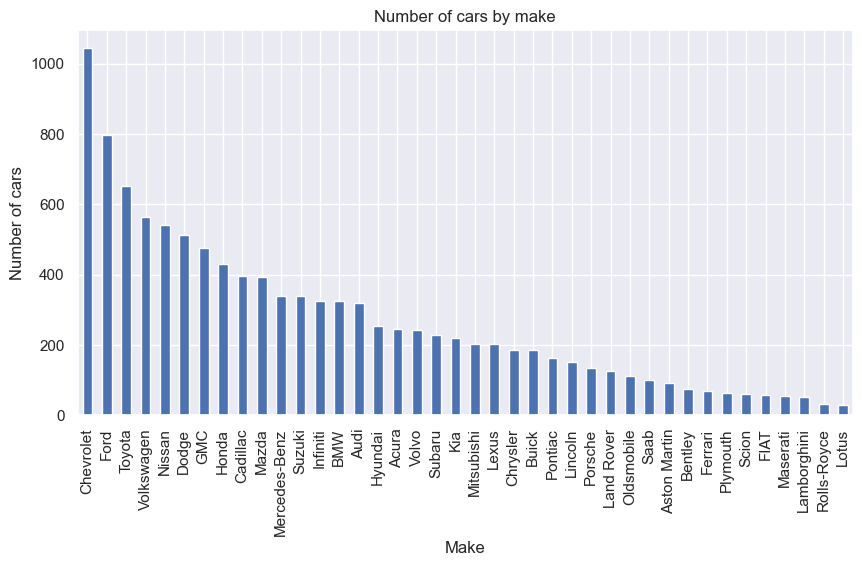

In [39]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

### Cars prices range

To show the number of cars in a specific price range, the dataset can be splitted into different bins of 10'000 dollars each, until reaching the 90'000 dollars price range. A boxplot can be used to display the price ranges. Cars from the price range from 20 thousands dollars to 30 thousands is the price range with the most number of cars counted.

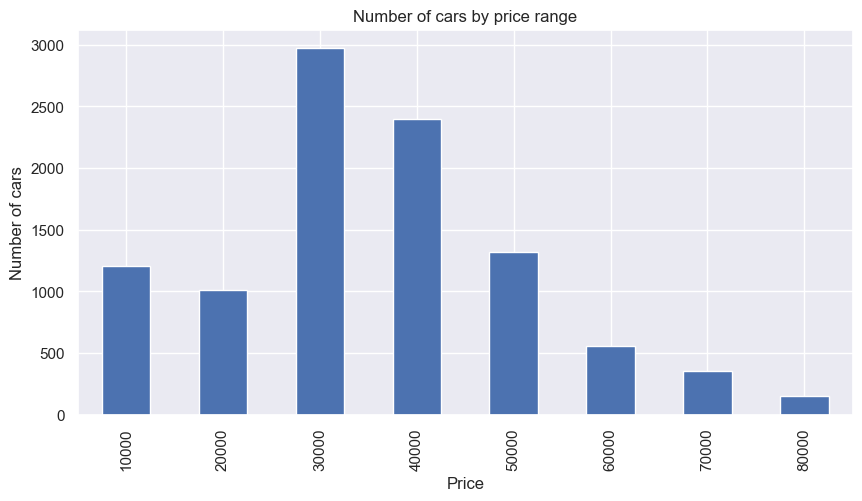

In [40]:
bins = [bin for bin in range(0, 90000, 10000)]
price_bins = pd.cut(df['Price'], bins=bins)

bin_edges = price_bins.cat.categories.right
bin_edges_sorted = sorted(bin_edges)
car_counts = df['Price'].value_counts(bins=bins)
car_counts_sorted = car_counts.reindex(bin_edges_sorted)

# Plot the bar chart
car_counts_sorted.plot(kind='bar', figsize=(10, 5))
plt.title("Number of cars by price range")
plt.ylabel('Number of cars')
plt.xlabel('Price');

### A surge in car prices in the year 2000

With the Pandas `groupby` function, the Price mean is calculated for each year. Later, a time serires plot is produced to see the fluctuation of price over the years.

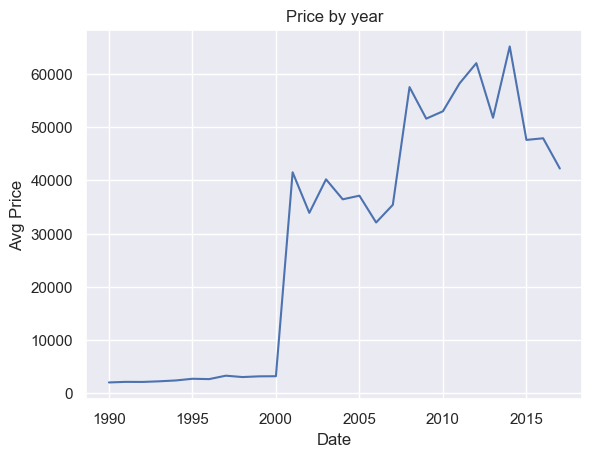

In [41]:
price_yearly_mean = df.groupby(df['Year'])['Price'].mean()
plt.plot(price_yearly_mean)
plt.xlabel('Date')
plt.ylabel('Avg Price')
plt.title('Price by year')
plt.show()

### Automatic transmission cars are more popular

To better understand the number of manual transimission car compared to automatic transmission, a time series line graph can be produced. First, the dataset can be filtered if the `Transmission` field is labeled with either `manual` or `automatic`. After using the `groupby` function for calculating the number of the transmission type for each year, it is clear that after the year 2000 Automatic transmission cars have been more more popular in the dataset.

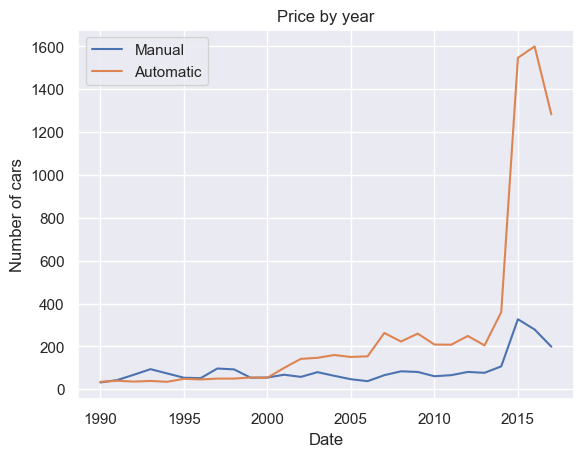

In [42]:
manual_transmission_df = df[df['Transmission'].str.lower() == 'manual']
manual_counts_by_year = manual_transmission_df.groupby('Year').size()

automatic_transmission_df = df[df['Transmission'].str.lower() == 'automatic']
automatic_counts_by_year = automatic_transmission_df.groupby('Year').size()

plt.plot(manual_counts_by_year, label='Manual')
plt.plot(automatic_counts_by_year, label='Automatic')
plt.xlabel('Date')
plt.ylabel('Number of cars')
plt.title('Price by year')
plt.legend()
plt.show()

### Increasing car horsepower has led to increased fuel consumption

The following two line chart plots are showing the increase of car's horsepower as well as an increase of miles-per-gallon consumption. With the usage of the `groupby` function we were able to calculate the mean of car's horsepower and miles-per-gallon consumption for each year.

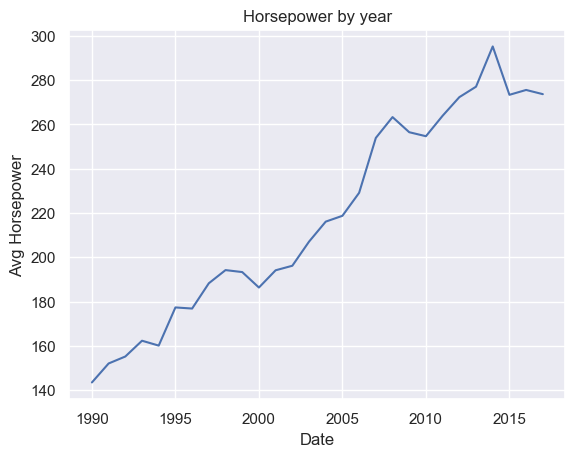

In [43]:
hp_yearly_mean = df.groupby(df['Year'])['HP'].mean()
plt.plot(hp_yearly_mean, label='Horsepower')
plt.xlabel('Date')
plt.ylabel('Avg Horsepower')
plt.title('Horsepower by year')
plt.show()

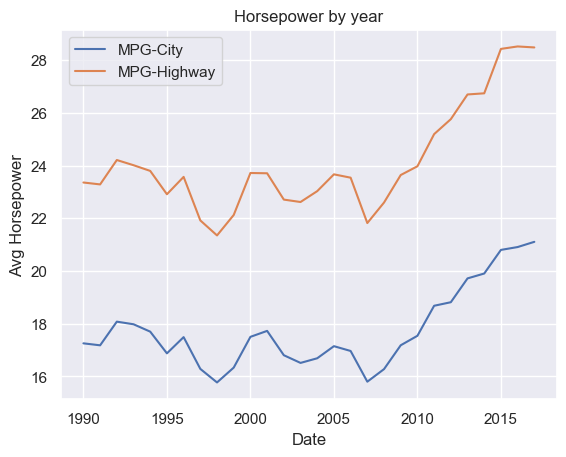

In [44]:
mpg_city_yearly_mean = df.groupby(df['Year'])['MPG-City'].mean()
mpg_highway_yearly_mean = df.groupby(df['Year'])['MPG-Highway'].mean()
plt.plot(mpg_city_yearly_mean, label='MPG-City')
plt.plot(mpg_highway_yearly_mean, label='MPG-Highway')
plt.xlabel('Date')
plt.ylabel('Avg Horsepower')
plt.title('Horsepower by year')
plt.legend()
plt.show()

### Car price is influenced by horsepower and cylinder count

For each numeric variable, which we can compute with the Pandas `select_dtypes`, we can calulate a correlation matrix and show it as an heat map where each cell is colored based on its value. In the below heat map we know that the price feature depends mainly on the Engine Size, Horsepower, and Cylinders.

<Axes: >

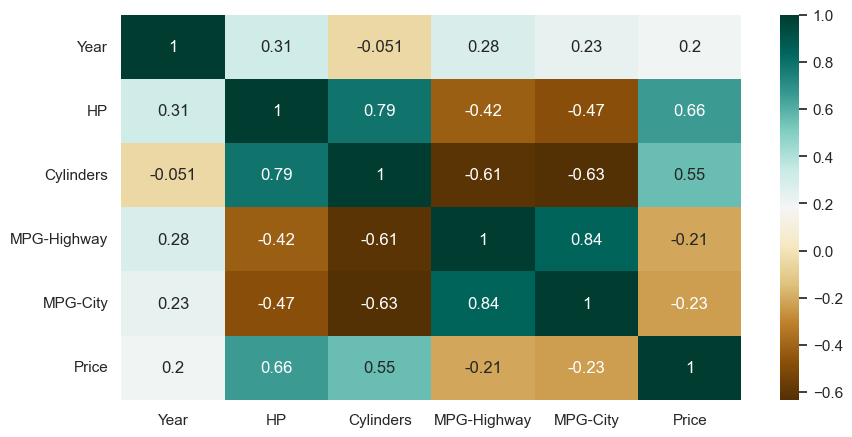

In [45]:
# using only numeric data for correlation map
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10,5))
correlation = numeric_df.corr()
sns.heatmap(correlation,cmap="BrBG",annot=True)

### Higher the price, higher the horsepower

A scatterplot will show each record, in our case, each car in a horizontal and vertical axis. In this case we are interested in learning more about how prices are affected by a car's horsepower. With the plot given below, by using price as our y-axis and horsepower as our y-axis we can see that higher the horsepower the price will also be higher.

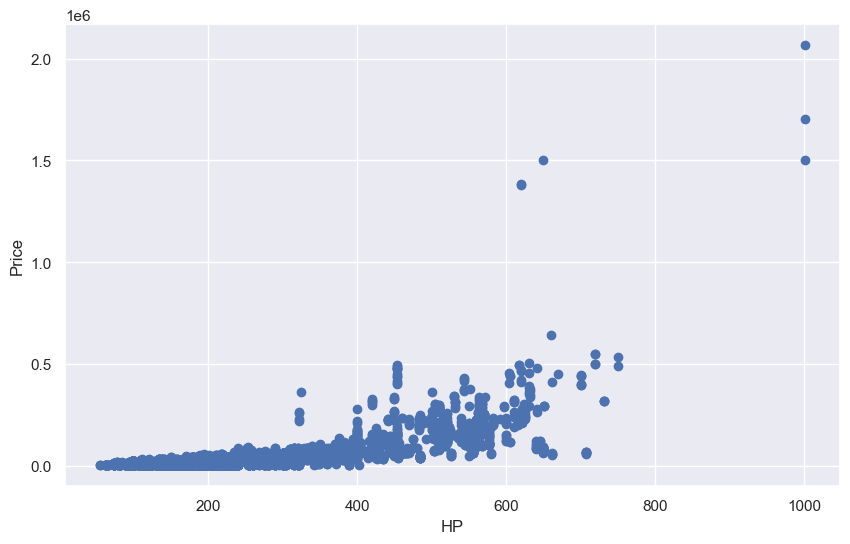

In [46]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

### Cars' miles per gallon comparison

In case we are interested to know the cars gas consumption, the scatterplot below, shows how we can expect that as the mile per gallon in the city increases also the miles per gallons on the highway increases as well.

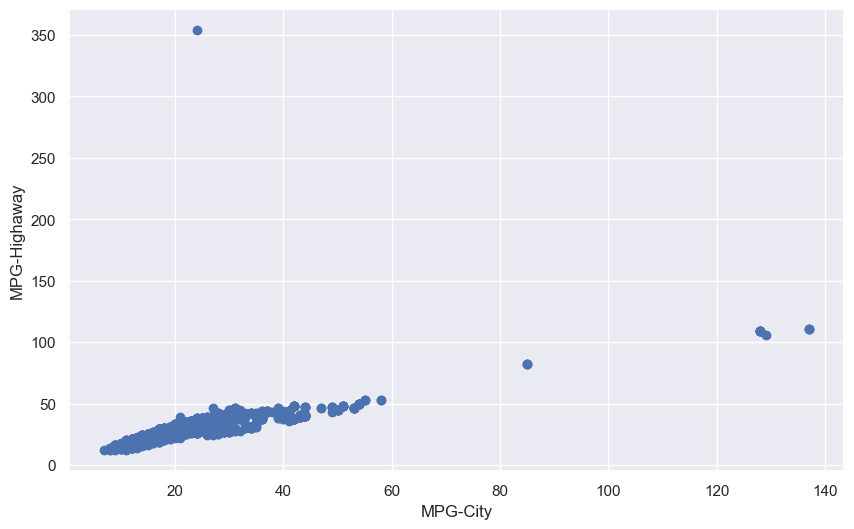

In [47]:
# plotting two more highly correlated features
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['MPG-City'], df['MPG-Highway'])
ax.set_xlabel('MPG-City')
ax.set_ylabel('MPG-Highaway')
plt.show()